2023-05-23 14:17:28.884299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                     Data Group 1                                     |
|——————————————————————————————————————————————————————————————————————————————————————|
|     EBN0[DB]   |    SER(ZF)   |    SER(LMMSE)   |    SER(DIP)   |    Time Spent(s)   |
|——————————————————————————————————————————————————————————————————————————————————————|
|   -20.00000000    0.91497803       0.87725830       0.88305664       376.36893415    |
|——————————————————————————————————————————————————————————————————————————————————————|
|    5.00000000     0.31433105       0.24212646       0.18737793       471.37268209    |
|——————————————————————————————————————————————————————————————————————————————————————|
|   30.00000000     0.00134277       0.00152588       0.04577637       431.23391199    |
|——————————————————————————————————————————————————————————————————————————————————————|
Done


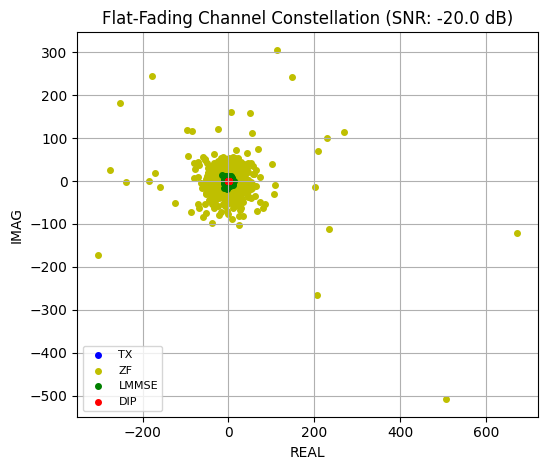

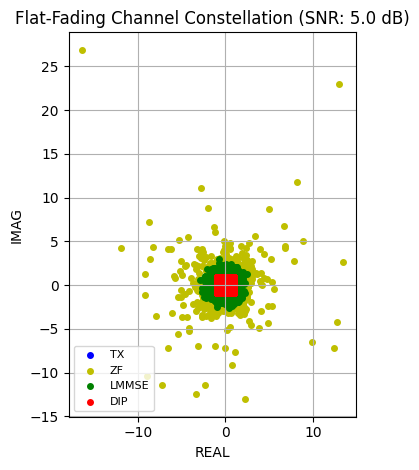

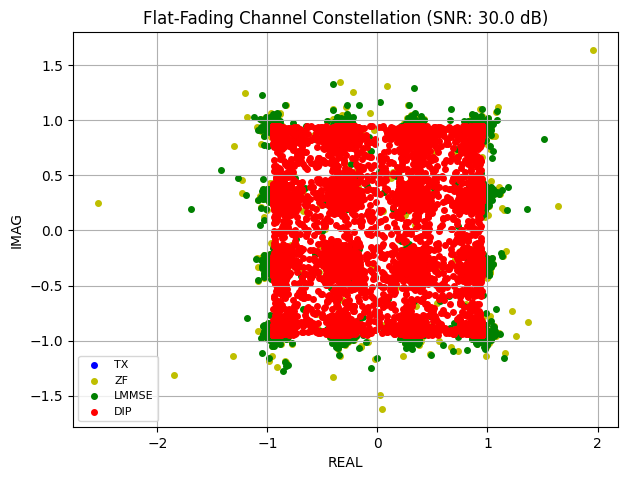

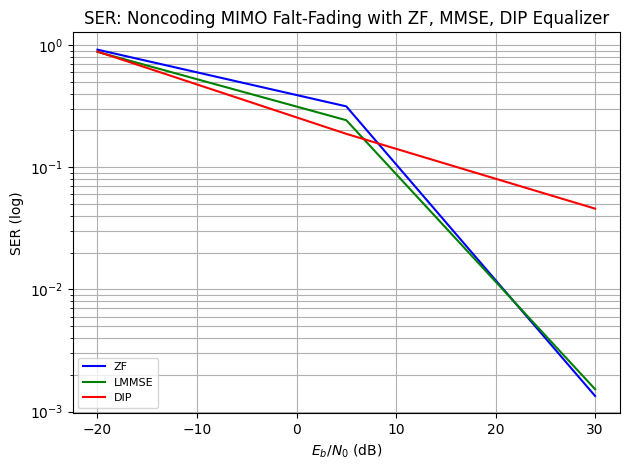

(array([-20.,   5.,  30.]),
 array([0.91497803, 0.31433105, 0.00134277]),
 array([0.8772583 , 0.24212646, 0.00152588]),
 array([0.88305664, 0.18737793, 0.04577637]))

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from UncodedSystemFlatFading import UncodedSystemFlatFading

Block_Length = 512         # Block Length (k)
NUM_BITS_PER_SYMBOL = 4    # Mapping: 16QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_RX_ANT = 4             # Receive Antennas
NUM_TX_ANT = 4            # Transmit Antennas

NUM_DATA_GROUP = 1         # Number of Data Group
BATCH_SIZE = 32            # Number of Parallelly Processed Batches
EBN0_DB_MIN = -20.0         # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 30.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 3        # EBNO Points

model_uncoded_ff = UncodedSystemFlatFading(Block_Length, 
                                           NUM_BITS_PER_SYMBOL,
                                           CONSTELLATION_TYPE,
                                           DEMAPPING_METHOD,
                                           NUM_RX_ANT,
                                           NUM_TX_ANT)

model_uncoded_ff(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)

In [35]:
import plotly.graph_objects as go

# 生成曲线数据
x = [1, 2, 3, 4, 5]
y1 = [0.1, 0.01, 0.001, 0.0001, 0.00001]
y2 = [0.05, 0.005, 0.0005, 0.00005, 0.000005]
y3 = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# 创建交互式图形对象
fig = go.Figure()

# 添加第一条曲线
fig.add_trace(go.Scatter(x=x, y=y1, name='Curve 1'))

# 添加第二条曲线
fig.add_trace(go.Scatter(x=x, y=y2, name='Curve 2'))

# 添加第三条曲线
fig.add_trace(go.Scatter(x=x, y=y3, name='Curve 3'))

# 设置纵轴为对数刻度，并指定刻度标签的格式和位置
fig.update_layout(
    yaxis_type='log',
    yaxis_tickformat='.2e',
    yaxis_tickvals=[0.1, 0.01, 0.001, 0.0001, 0.00001],
    yaxis_ticktext=['10^-1', '10^-2', '10^-3', '10^-4', '10^-5']
)

# 显示图形
fig.show()


In [3]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool
from bokeh.io import output_notebook

# 生成示例数据
x = [1, 2, 3, 4, 5]
y1 = [1, 10, 100, 1000, 10000]
y2 = [2, 20, 200, 2000, 20000]
y3 = [3, 30, 300, 3000, 30000]

# 创建绘图对象
p = figure(y_axis_type="log", x_axis_label='X', y_axis_label='Y', title='Plot with Log Scale')

# 添加曲线
p.line(x, y1, legend_label='Curve 1', line_color='blue')
p.line(x, y2, legend_label='Curve 2', line_color='red')
p.line(x, y3, legend_label='Curve 3', line_color='green')

# 添加鼠标悬停工具
hover_tool = HoverTool(tooltips=[("x", "@x"), ("y", "@y")])
p.add_tools(hover_tool)

# 设置标题
p.title.text = "Custom Title" # type: ignore
p.title.align = "center" # type: ignore
p.title.text_font_style = "italic" # type: ignore
p.title.text_font_size = "18pt" # type: ignore

# 设置横轴标签
p.xaxis.axis_label = "Custom X Label"
p.xaxis.axis_label_text_font_style = "bold"
p.xaxis.axis_label_text_font_size = "12pt"

# 设置纵轴标签
p.yaxis.axis_label = "Custom Y Label"
p.yaxis.axis_label_text_font_style = "bold"
p.yaxis.axis_label_text_font_size = "12pt"

# 设置图例字体样式和大小
p.legend.label_text_font_style = "italic"
p.legend.label_text_font_size = "10pt"

# 设置图例位置为右上角
p.legend.location = 'bottom_right'

# 在编译器中显示图形
output_notebook()

# # 设置输出文件
# output_file("plot.html")

# 显示图形
show(p)
# show(p, browser=None)

# # 在默认浏览器中打开 HTML 文件
# import webbrowser
# webbrowser.open("plot.html")


Loading BokehJS ...

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from UncodedSystemFlatFading import UncodedSystemFlatFading

Block_Length = 512         # Block Length (k)
NUM_BITS_PER_SYMBOL = 4    # Mapping: 16QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 4             # Transmit Antennas
NUM_RX_ANT = 16             # Receive Antennas

NUM_DATA_GROUP = 1        # Number of Data Group
BATCH_SIZE = 1024            # Number of Parallelly Processed Batches
EBN0_DB_MIN = 0.0        # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 15.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 8       # EBNO Points

model_uncoded_ff = UncodedSystemFlatFading(Block_Length, 
                                           NUM_BITS_PER_SYMBOL,
                                           CONSTELLATION_TYPE,
                                           DEMAPPING_METHOD,
                                           NUM_RX_ANT,
                                           NUM_TX_ANT)

model_uncoded_ff(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)

2023-05-24 18:04:17.542304: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|